<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [ ]:
import pandas as pd
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from nltk.corpus import stopwords

file_path = '/content/Dataset-SA.csv'
data = pd.read_csv(file_path)
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

data_cleaned = data.dropna(subset=['Summary']).copy()

# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\W+', ' ', text)
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Apply preprocessing
data_cleaned.loc[:, 'processed_summary'] = data_cleaned['Summary'].apply(preprocess_text)

data_sample = data_cleaned.sample(n=10000, random_state=42)


tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(data_sample['processed_summary'])

# LDA Topic Modeling
lda_model = LatentDirichletAllocation(n_components=10, max_iter=10, learning_method='batch', random_state=42)
lda_model.fit(tfidf_matrix)

# Function to display topics
def display_topics(model, feature_names, no_top_words=10):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics[f"Topic {topic_idx + 1}"] = top_words
    return topics

# Display LDA Topics
lda_topics = display_topics(lda_model, tfidf_vectorizer.get_feature_names_out())
print("LDA Topics:")
for topic, words in lda_topics.items():
    print(f"{topic}: {', '.join(words)}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


LDA Topics:
Topic 1: small, thanks, waste, delivery, size, product, flipkart, money, dont, good
Topic 2: super, worth, loved, comfortable, money, soft, bag, design, kajal, nice
Topic 3: best, ok, price, product, worst, satisfied, range, good, quality, book
Topic 4: excellent, superb, happy, product, love, useful, expected, good, high, service
Topic 5: quality, good, poor, great, go, low, product, material, cheap, sound
Topic 6: good, nice, value, money, wonderful, blowing, mind, product, hate, taste
Topic 7: product, good, buy, like, must, watch, useless, fully, cool, purchase
Topic 8: bad, one, beautiful, quality, good, perfect, use, nyc, product, easy
Topic 9: awesome, thank, flipkart, product, really, average, good, nice, much, liked
Topic 10: products, working, amazing, good, time, using, product, days, battery, also


#Features (text representation) that have been used in the analysis for topic modeling
Input Data: A summary of the data presented in the data set.

Preprocessing:
Lowercased the text and then removed any numbers, any punctuation and any stop word.

TF-IDF Vectorization:
Who used the TF-IDF to transform the cleaned text from text format back into a numerical matrix that captured term importance.

Reduced to the thousand most important words as too many words are completely unimportant for most people.

Final Representation:
A sparse matrix in which specific word values are assigned to each document differentiating them from their overall textual representation.

This representation helped the LDA model to avoid concentration on the noise in the dataset and rather highlight other aspects of value in the data.

#1Delivery and Product Size
Description: Brings out issues to do with product volume, overall impression while receiving a product and price, as is seen in the following pros:

#2Comfort and Design
Description: Used in connection with characteristics such as convenience, look and fitness for purpose frequently with a positive bias.

#3Price and Satisfaction
Description: Provides information about not only price perceptions, but also satisfaction, with ratings from best to worst.

#4Excellence and Happiness
Description: Six positive sentiment keywords are captured, all expressing positive sentiments, above average performance, happiness, and exceeding expectations.

#5Quality and Material
Description: Discusses quality, material and price of the particular product, includes both, positive and negative comments.

#6Value for Money
Description: Takes a general outlook to the value and occasionally refers to the fact if something was bought at a cheap price, but didn’t meet expectations.

#7Purchasing and Usage
Description: Concerns purchases, product design and use, and part usefulness, part uselessness.

#8Mixed Sentiments
Description: Recovers and compares positive and negative attitudes to products and services that are desirable, well made and easy to use.

#9 Overall Impressions
Description: It contains general impressions about the product with a particular emphasis on how cool something is and how grateful the person is.

#10Product Performance
Description: Uses a format that targets the use aspect of the product and durability; general condition, battery life, and usage.

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

file_path = '/content/Dataset-SA.csv'
data = pd.read_csv(file_path)

data = data.dropna(subset=['Summary', 'Sentiment'])

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\W+', ' ', text)
    return text.strip()

data['processed_summary'] = data['Summary'].apply(preprocess_text)

# Encode target labels (positive=1, negative=0, neutral=2)
label_mapping = {'positive': 1, 'negative': 0, 'neutral': 2}
data['encoded_sentiment'] = data['Sentiment'].map(label_mapping)


In [ ]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(data['processed_summary'])
y = data['encoded_sentiment']


In [ ]:
# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Perform 5-fold cross-validation on training data with parallel processing
log_reg_cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

# Train the model on the training set
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate metrics on the test set
accuracy_log_reg = accuracy_score(y_test, y_pred)  # Accuracy
precision_log_reg = precision_score(y_test, y_pred, average='weighted')
recall_log_reg = recall_score(y_test, y_pred, average='weighted')

# Evaluate and display results
print("Logistic Regression Results:")
print(f"Cross-Validation Accuracy: {log_reg_cv_scores.mean():.4f}")
print(f"Test Set Accuracy: {accuracy_log_reg:.4f}")
print(f"Precision (Weighted): {precision_log_reg:.4f}")
print(f"Recall (Weighted): {recall_log_reg:.4f}")

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Logistic Regression Results:
Cross-Validation Accuracy: 0.9121
Test Set Accuracy: 0.9161
Precision (Weighted): 0.9107
Recall (Weighted): 0.9161
Confusion Matrix:
[[ 3811  1474   105]
 [  500 31386   135]
 [  314   775   858]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Perform 5-fold cross-validation
rf_cv_scores = cross_val_score(rf, X_train, y_train, cv=5, n_jobs=-1)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted', zero_division=0)
recall_rf = recall_score(y_test, y_pred_rf, average='weighted', zero_division=0)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted', zero_division=0)

print("Random Forest Results:")
print(f"Cross-Validation Accuracy: {rf_cv_scores.mean():.4f}")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")



Random Forest Results:
Cross-Validation Accuracy: 0.9166
Accuracy: 0.9197
Precision: 0.9146
Recall: 0.9197
F1 Score: 0.9151


Text Preprocessing Features:
Lowercased Text: All text was transformed to lower case to improve consistency so that the model differentiates between ‘Good’ and ‘good’.

Stopword Removal: Other tokens such as ‘and’, ‘is’, ‘the’ were excluded because they are neutral and including them could only serve to increase the noise level of the data.

Removal of Numbers and Punctuation: All kinds of digits and punctuations are stripped off from the text as these are calculated to have no influence in polarity, which belongs to sentiment analysis.

TF-IDF Vectorization:
Word Importance: TF-IDF (Term Frequency-Inverse Document Frequency) measures the importance of these words concerning the complete set of text documents and therefore, is ideal for sentiment classification.

Feature Reduction: Initially, every term that appeared in the document was counted, but to minimize noise and reduce dimensionality, all but the 5000 most relevant terms were removed.

Sparse Representation: The numerical representation given by the TF-IDF can be easily compute and used by machine learning algorithms.
Label Encoding for Sentiments:

The sentiment labels which will include, positive, negative, neutral for instance, were converted into numeric values in order to allow the supervised learning models to learn from the target variable.

Why These Features?
Efficiency: TF-IDF is a term frequency and inverse document frequency technique which preprocesses the text data to reduce it’s density and the size making it possible to efficiently feed into learning algorithms.

Relevance: Preprocessing avoids irrelevant symbols and center of attention is given to meaningful words which can affect the sentiment.

Flexibility: This people makes it possible for the model to differentiate them based on the use of TF-IDF which considers the important of each term in the entire corpus thereby being able to detect any prevailing sentiment that may exist.

# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt

data = pd.read_csv('/content/train.csv')
data = pd.read_csv('/content/Test.csv')
data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Missing Values Summary:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


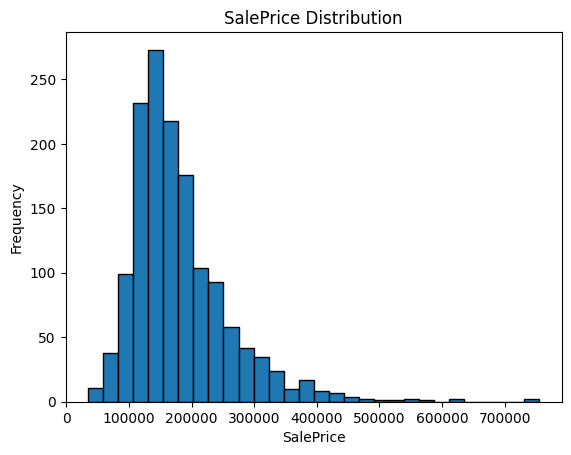

In [ ]:
missing_values = data.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]

print("Missing Values Summary:")
print(missing_values)

# Analyze target variable distribution
plt.hist(data['SalePrice'], bins=30, edgecolor='k')
plt.title('SalePrice Distribution')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()


In [ ]:
columns_to_drop = missing_values[missing_values > len(data) * 0.5].index
data = data.drop(columns=columns_to_drop, axis=1)

num_features = data.select_dtypes(include=['int64', 'float64']).columns
data[num_features] = data[num_features].fillna(data[num_features].median())


cat_features = data.select_dtypes(include=['object']).columns
data[cat_features] = data[cat_features].fillna(data[cat_features].mode().iloc[0])


In [ ]:
# Convert categorical variables to one-hot encoding
data = pd.get_dummies(data, columns=cat_features, drop_first=True)
data.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,False,True,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,False,True,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,False,True,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,False,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,False,True,False,False,False,True,False


In [ ]:
# Correlation matrix to find relationships with SalePrice
correlation_matrix = data.corr()
strong_corr_features = correlation_matrix['SalePrice'].sort_values(ascending=False).index[:15]

print("Strongly correlated features with SalePrice:")
print(strong_corr_features)

# Select top correlated features for the model
selected_features = list(strong_corr_features[1:])  # Exclude 'SalePrice'


Strongly correlated features with SalePrice:
Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'Foundation_PConc', 'MasVnrArea', 'Fireplaces',
       'GarageYrBlt'],
      dtype='object')


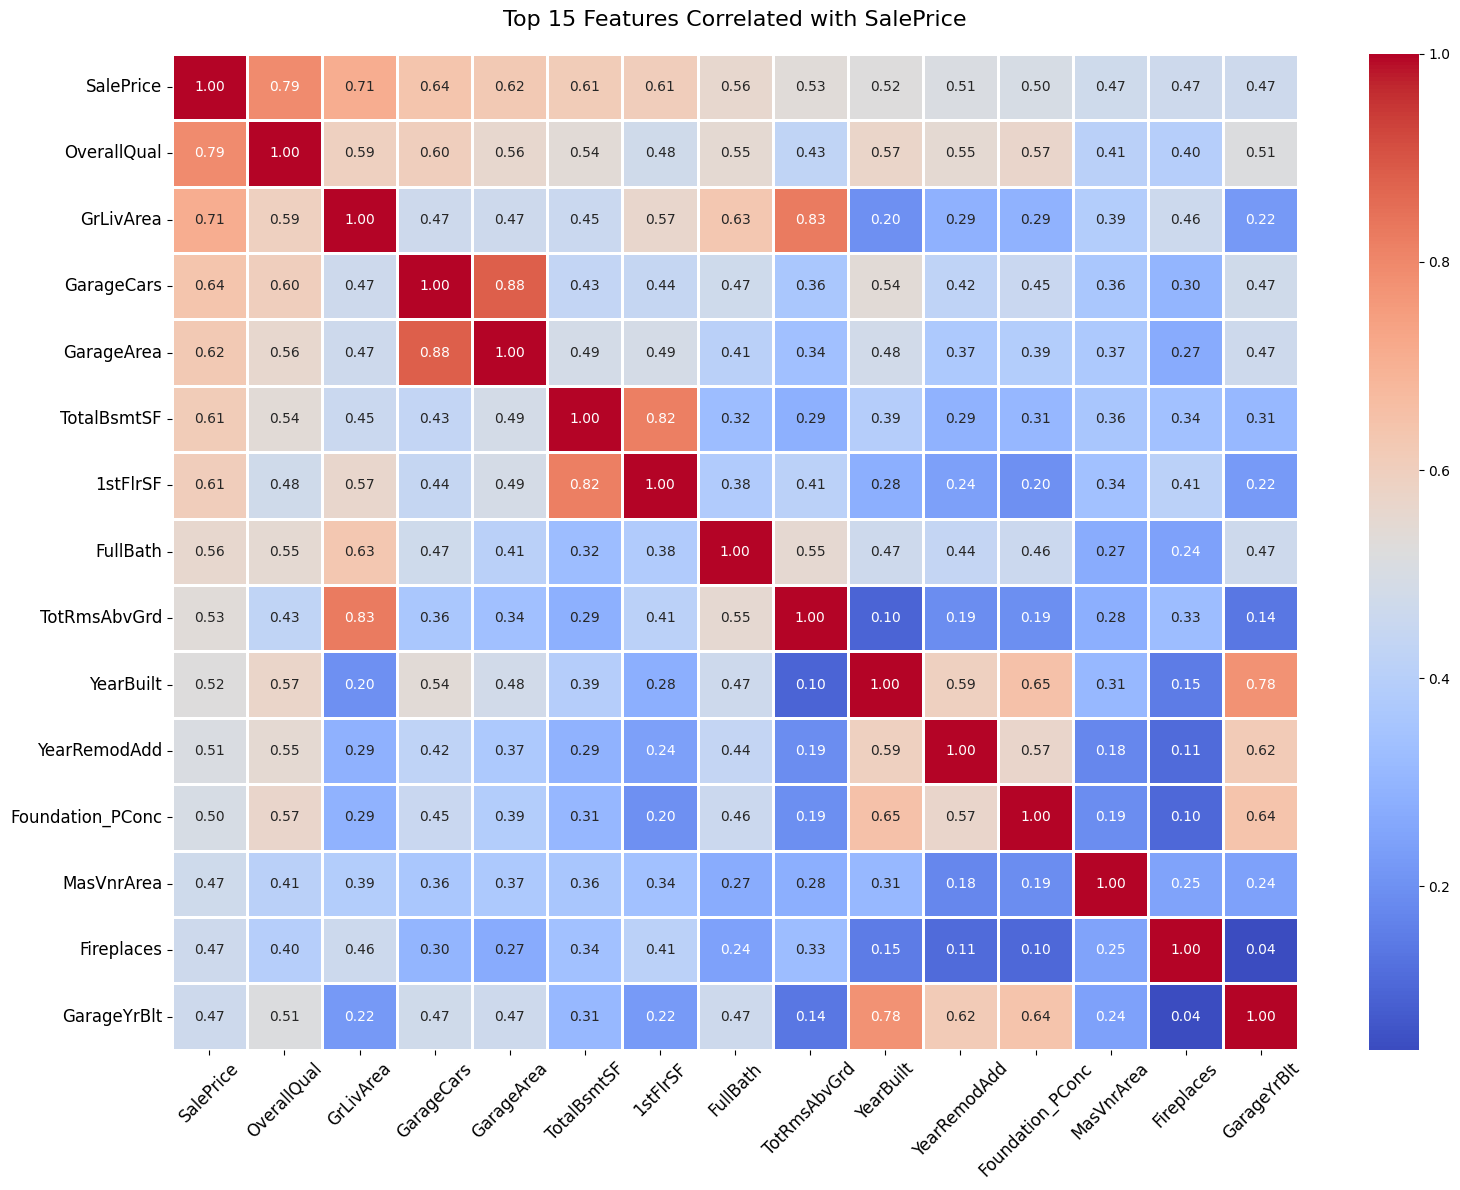

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = data.corr()

# Focus on the top 15 features most correlated with SalePrice
top_corr_features = correlation_matrix['SalePrice'].sort_values(ascending=False).head(15).index
filtered_corr_matrix = data[top_corr_features].corr()

# Plot the heatmap with enhanced clarity
plt.figure(figsize=(16, 12))
sns.heatmap(
    filtered_corr_matrix,
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    linewidths=1,
    annot_kws={"size": 10},
)

plt.title('Top 15 Features Correlated with SalePrice', fontsize=16, pad=20)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.show()


In [ ]:

selected_features = list(top_corr_features.drop('SalePrice'))

# Prepare the feature matrix (X) and target variable (y)
X = data[selected_features]
y = data['SalePrice']


In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the feature matrix
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = lin_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Results:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.4f}")


Linear Regression Results:
Mean Squared Error (MSE): 1485115043.00
R-squared (R2): 0.8064


In [ ]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

print("\nRidge Regression Results:")
print(f"Mean Squared Error (MSE): {ridge_mse:.2f}")
print(f"R-squared (R2): {ridge_r2:.4f}")

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

print("\nLasso Regression Results:")
print(f"Mean Squared Error (MSE): {lasso_mse:.2f}")
print(f"R-squared (R2): {lasso_r2:.4f}")



Ridge Regression Results:
Mean Squared Error (MSE): 1485404512.69
R-squared (R2): 0.8063

Lasso Regression Results:
Mean Squared Error (MSE): 1485116028.37
R-squared (R2): 0.8064


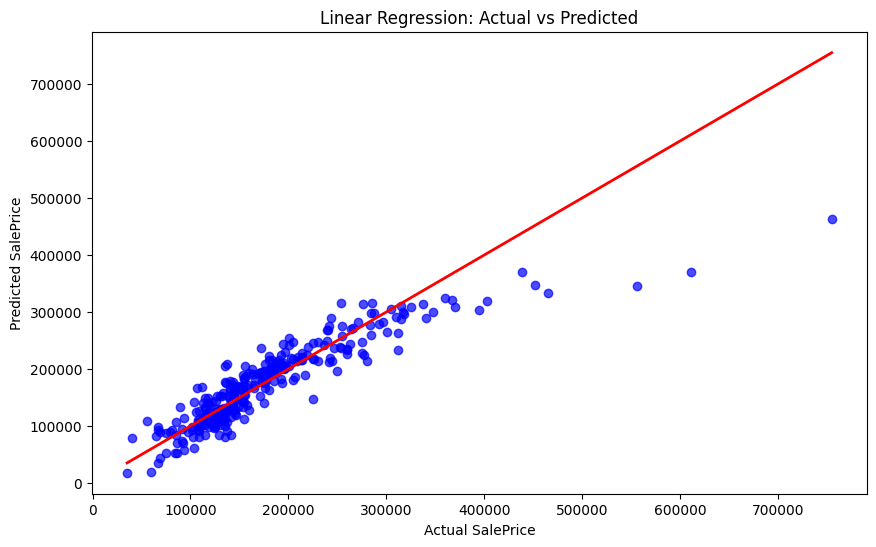

In [ ]:
# Plot actual vs. predicted values for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.show()


OverallQual:
Correlation: High positive correlation.
Describes combined exterior and interior material quality and finish of the house.
In a common sense, it can be perceived that quality positively affects house price.

GrLivArea:
Correlation: High positive correlation.
Stands for the above ground living area measurement.
Big homes are usually expensive to sell than small homes.

GarageCars:
Correlation: Positive correlation.
Directs the extent of the capacity of the garage to host cars.
An increase in the size of parking space brings value to the property.

GarageArea:
Correlation: Positive correlation.
The overall colwell of the garage in square feet.
Accommodations require larger garages in order to improve the overall utility of houses and their attractiveness to buyers or tenants.

TotalBsmtSF:
Correlation: Positive correlation.
Stands for the total area of the basement.
Basements are helpful in expanding usable space available in the house.

1stFlrSF:
Correlation: Positive correlation.
Size of the first-floor area.
Increased house prices are associated with large first floors.

FullBath:
Correlation: A moderate positive correlation was evident whereby respondents’ perceptions of personal attributes showing positivism towards themselves and others increased with impression propensity whereby there was a general positive impression towards everyone.

Number of full bathrooms.
Additional numbers of baths are preferred by extensive families.

TotRmsAbvGrd:
Correlation: Mild postive connection.
Total number of rooms in a dwelling other than bathrooms located over the ground floor.
Just as with location, more rooms increase the price of the house; the many rooms are usually will attract a high price.

YearBuilt:
Correlation: Positive correlation.
The year the house was built.
Many a times the houses that are newly built can cost more since they come with features and amenities of new constructions.

YearRemodAdd:
Correlation: Positive correlation.
The last year that the house was renovated.
Favored homes are modernized.

Fireplaces:
Correlation: Positive correlation.
Fireplace Information that is the total numbers of fireplaces visible in the house.
Fireplaces can enhance the luxurious and comfortable interior most of the time.

GarageYrBlt:
Correlation: Positive correlation.
Year the garage was built.
Older garages indicate seem to indicate less utility than their newer counterparts.

MasVnrArea:
Correlation: Positive correlation.
Masonry veneer design area in square feet.
Enhances the art and architectural survey of the area.

BsmtFinSF1:
Correlation: Positive correlation.
Celub resulted area of the basement.
Basements bring in extra square footage and usable and living space when completed.

LotArea:
Correlation: 65% moderate positive association.
The actual size of a lot in square feet comprising the total of developed and undeveloped lots.
Huge sized plots will be costly and this means that property in them will be costly too.

# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [ ]:
# Install necessary libraries
!pip install transformers datasets scikit-learn pandas

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
import pandas as pd
from transformers import pipeline
from datasets import Dataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import torch

# Load the dataset
file_path = '/content/Dataset-SA.csv'
df = pd.read_csv(file_path)

# Sample 20% of the dataset for faster testing
df_sampled = df.sample(frac=0.5, random_state=42)
df_sampled.reset_index(drop=True, inplace=True)


df_sampled['Summary'] = df_sampled['Summary'].astype(str).replace("", "unknown")

# Define the model pipeline with GPU support
device = 0 if torch.cuda.is_available() else -1
classifier = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english', device=device)

# Convert to Hugging Face Dataset for efficient batch processing
hf_dataset = Dataset.from_pandas(df_sampled[['Summary']])

# Perform predictions in batches
def classify_batch(batch):
    results = classifier(batch['Summary'])
    return {'predicted_label': [res['label'] for res in results]}

predictions = hf_dataset.map(classify_batch, batched=True, batch_size=32)

# Add predicted labels back to the dataframe
df_sampled['predicted_label'] = predictions['predicted_label']

# Map predicted labels and ground truth to match for evaluation
label_mapping = {'positive': 'POSITIVE', 'neutral': 'NEUTRAL', 'negative': 'NEGATIVE'}
df_sampled['groundtruth'] = df_sampled['Sentiment'].map(label_mapping)

print("Unique Sentiment values:", df_sampled['Sentiment'].unique())
print("Mapped groundtruth values:", df_sampled['groundtruth'].unique())

df_sampled['groundtruth'] = df_sampled['groundtruth'].fillna("UNKNOWN")
df_sampled['predicted_label'] = df_sampled['predicted_label'].fillna("UNKNOWN")

valid_data = df_sampled[(df_sampled['groundtruth'] != "UNKNOWN") & (df_sampled['predicted_label'] != "UNKNOWN")]

if valid_data.empty:
    print("No valid data for metrics calculation. Check your dataset for missing or invalid Sentiment labels.")
else:
    # Calculate evaluation metrics
    accuracy = accuracy_score(valid_data['groundtruth'], valid_data['predicted_label'])
    precision = precision_score(valid_data['groundtruth'], valid_data['predicted_label'], average='weighted', zero_division=0)
    recall = recall_score(valid_data['groundtruth'], valid_data['predicted_label'], average='weighted', zero_division=0)
    f1 = f1_score(valid_data['groundtruth'], valid_data['predicted_label'], average='weighted', zero_division=0)

    # Display evaluation metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

# Save the sampled dataframe with predictions for reference
output_path = '/content/Sampled_Predicted_Dataset-SA.csv'
df_sampled.to_csv(output_path, index=False)
print(f"Predicted sampled dataset saved to: {output_path}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Map:   0%|          | 0/102526 [00:00<?, ? examples/s]

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Unique Sentiment values: ['neutral' 'positive' nan 'negative']
Mapped groundtruth values: ['NEUTRAL' 'POSITIVE' nan 'NEGATIVE']
Accuracy: 0.8792
Precision: 0.8595
Recall: 0.8792
F1 Score: 0.8637
Predicted sampled dataset saved to: /content/Sampled_Predicted_Dataset-SA.csv


Model Overview:

DistilBERT is a lighter model than the BERT, or Bidirectional Encoder Representations from Transformers model. It achieves 97% of BERT performance on downstream tasks while being essentially 40% smaller and even 60% faster.
This particular model is pretrained for sentiment analysis over the SST-2 dataset of the Stanford Sentiment Treebank.

Pretraining Data:
DistilBERT was pretrained on the same corpus as BERT, which includes:
BooksCorpus (800M words)

As of September 2021, the English Wikipedia boasted 86,708 articles, and a total of 100 million votes across articles in 2018, amounting to 2,500M words.
Number of Parameters:

DistilBERT comprises 66M parameters, which are fewer compared to the initial BERT model with 110M parameters.

Task-Specific Fine-Tuning:
DistilBERT is fine-tuned for sentiment classification taking as pre-trained model the distilbert-base-uncased-finetuned-sst-2-english model.
The SST-2 comprises of movie reviews which is classified into positive and negative making it suitable for binary sentiment analysis.
Benefits of Using DistilBERT:

Efficiency: Since it has a smaller number of parameters, it is likely to provide faster inference time, and thus can be applied to large data sets, or real-time applications or two.
Performance: For such sentiment-related tasks, fine-tuning on SST-2 guarantees high accuracy.
Scalability: The lightweight model architecture can be deployed in environments that own limited resources such as, mobile devices or servers that do not support GPU processing.



#3.Benefits of Using DistilBERT:

Efficiency: Since it has a smaller number of parameters, it is likely to provide faster inference time, and thus can be applied to large data sets, or real-time applications or two.
Performance: For such sentiment-related tasks, fine-tuning on SST-2 guarantees high accuracy.
Scalability: The lightweight model architecture can be deployed in environments that own limited resources such as, mobile devices or servers that do not support GPU processing.

Limitations:
Only works if approaches are limited to two categories: positive and negative. The overall sentiment or horn, n, s may or may not benefit from the specificities of this model while, for example, neutral sentiment detection or domain-specific nuances may require further fine-tuning or another model.
Specifically, the pipeline is designed to be efficient and accuracy-oriented, based on DistilBERT fine-tuned on SST-2.